In [3]:
import numpy as np
from numpy import genfromtxt
from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

c:\users\mtx\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [31]:
data = pd.read_csv('candy-data.csv', index_col = 'competitorname')
Charleston_Chew = data.loc['Charleston Chew','chocolate':'pricepercent']
Dum_Dums = data.loc['Dum Dums','chocolate':'pricepercent']

In [32]:
train_data = data.drop(['Charleston Chew', 'Dum Dums'], axis = 0).drop('Y', axis = 1) 
y_true = train_data['winpercent']
train_data = train_data.drop('winpercent',axis = 1)

In [33]:
model = linear_model.LinearRegression()
model.fit(train_data,y_true)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
print(model.coef_)
print(model.intercept_)

[ 27.9655099   11.24694514  -5.53588243   6.09605053   9.35054942
  10.58596423  -7.28846514  -6.08760902  -4.8735739   12.91477216
 -11.174292  ]
37.04241839918207


In [36]:
predict1 = model.predict([Charleston_Chew])


In [37]:
predict2 = model.predict([Dum_Dums])

In [38]:
print(predict1)
print(predict2)

[70.3613277]
[50.07458554]


In [41]:
predict3 = model.predict([[0, 0, 0, 1, 0, 1, 1, 0, 1, 0.885, 0.649]])

In [42]:
print(predict3)

[45.73985197]


In [44]:
predict4 = model.predict([Charleston_Chew,Dum_Dums])

In [45]:
print(predict4)

[70.3613277  50.07458554]


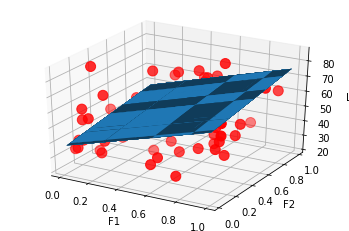

In [51]:
ax = plt.figure().add_subplot(111, projection = '3d')
ax.scatter(train_data['sugarpercent'],train_data['pricepercent'],y_true, c = 'r', marker = 'o', s = 100)
x0 = train_data['sugarpercent']
x1 = train_data['pricepercent']
x0, x1 = np.meshgrid(x0,x1)
z = model.intercept_ + x0*model.coef_[0] + x1* model.coef_[1]
ax.plot_surface(x0,x1,z)
ax.set_xlabel('F1')
ax.set_ylabel('F2')
ax.set_zlabel('L')
plt.show()